In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.datasets import cifar100
from keras.optimizers import Adam
from sklearn.metrics import classification_report

In [2]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data(label_mode='fine')

# Choose "apple" (class 0) and "orange" (class 53) from CIFAR-100 fine labels
selected_classes = [0, 53]  # Apple and Orange
train_mask = np.isin(train_labels, selected_classes).flatten()
test_mask = np.isin(test_labels, selected_classes).flatten()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Filter the dataset for the selected classes
train_images, train_labels = train_images[train_mask], train_labels[train_mask]
test_images, test_labels = test_images[test_mask], test_labels[test_mask]

# Map the labels: 0 for "apple" and 1 for "orange"
train_labels = np.where(train_labels == 0, 0, 1)
test_labels = np.where(test_labels == 0, 0, 1)

# Normalize images to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [4]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(test_labels, num_classes=2)

In [5]:
# Split training data into train and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(test_labels, num_classes=2)

In [6]:
# Define class names
class_names = ['apple', 'orange']

In [7]:
# Count the number of images in each set
train_count = x_train.shape[0]
val_count = x_val.shape[0]
test_count = test_images.shape[0]

# Count the number of images for each class in each set
train_class_counts = np.sum(y_train, axis=0)
val_class_counts = np.sum(y_val, axis=0)
test_class_counts = np.sum(y_test, axis=0)

# Print the counts
print("Dataset Counts:")
print(f"Training Set: {train_count} images")
print(f"Validation Set: {val_count} images")
print(f"Testing Set: {test_count} images")

print("\nClass-wise Counts:")
print(f"Training - Apple: {int(train_class_counts[0])}, Orange: {int(train_class_counts[1])}")
print(f"Validation - Apple: {int(val_class_counts[0])}, Orange: {int(val_class_counts[1])}")
print(f"Testing - Apple: {int(test_class_counts[0])}, Orange: {int(test_class_counts[1])}")


Dataset Counts:
Training Set: 800 images
Validation Set: 200 images
Testing Set: 200 images

Class-wise Counts:
Training - Apple: 398, Orange: 402
Validation - Apple: 102, Orange: 98
Testing - Apple: 100, Orange: 100


In [17]:
# Build the CNN model
def create_model(input_shape):
    """
    Create a CNN model to classify images into two categories: apple and orange.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(2, activation='softmax')  # Output layer for binary classification
    ])
    return model

# Define input shape
input_shape = x_train.shape[1:]

# Create and compile the model
model = create_model(input_shape)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=2
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 - 6s - 259ms/step - accuracy: 0.8025 - loss: 0.5874 - val_accuracy: 0.7600 - val_loss: 0.5861
Epoch 2/20
25/25 - 0s - 5ms/step - accuracy: 0.8913 - loss: 0.3142 - val_accuracy: 0.7800 - val_loss: 0.5448
Epoch 3/20
25/25 - 0s - 5ms/step - accuracy: 0.9125 - loss: 0.2062 - val_accuracy: 0.6600 - val_loss: 0.5561
Epoch 4/20
25/25 - 0s - 5ms/step - accuracy: 0.9312 - loss: 0.1820 - val_accuracy: 0.5550 - val_loss: 0.6969
Epoch 5/20
25/25 - 0s - 6ms/step - accuracy: 0.9262 - loss: 0.1942 - val_accuracy: 0.5250 - val_loss: 0.9677
Epoch 6/20
25/25 - 0s - 5ms/step - accuracy: 0.9262 - loss: 0.1704 - val_accuracy: 0.5100 - val_loss: 1.9186
Epoch 7/20
25/25 - 0s - 6ms/step - accuracy: 0.9375 - loss: 0.1540 - val_accuracy: 0.5100 - val_loss: 1.8733
Epoch 8/20
25/25 - 0s - 5ms/step - accuracy: 0.9525 - loss: 0.1166 - val_accuracy: 0.5100 - val_loss: 1.9455
Epoch 9/20
25/25 - 0s - 7ms/step - accuracy: 0.9450 - loss: 0.1301 - val_accuracy: 0.5100 - val_loss: 1.8002
Epoch 10/20
25/25 - 0s - 10m

Test Accuracy: 0.92


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Classification Report:
              precision    recall  f1-score   support

       apple       0.85      1.00      0.92       100
      orange       1.00      0.83      0.91       100

    accuracy                           0.92       200
   macro avg       0.93      0.92      0.91       200
weighted avg       0.93      0.92      0.91       200



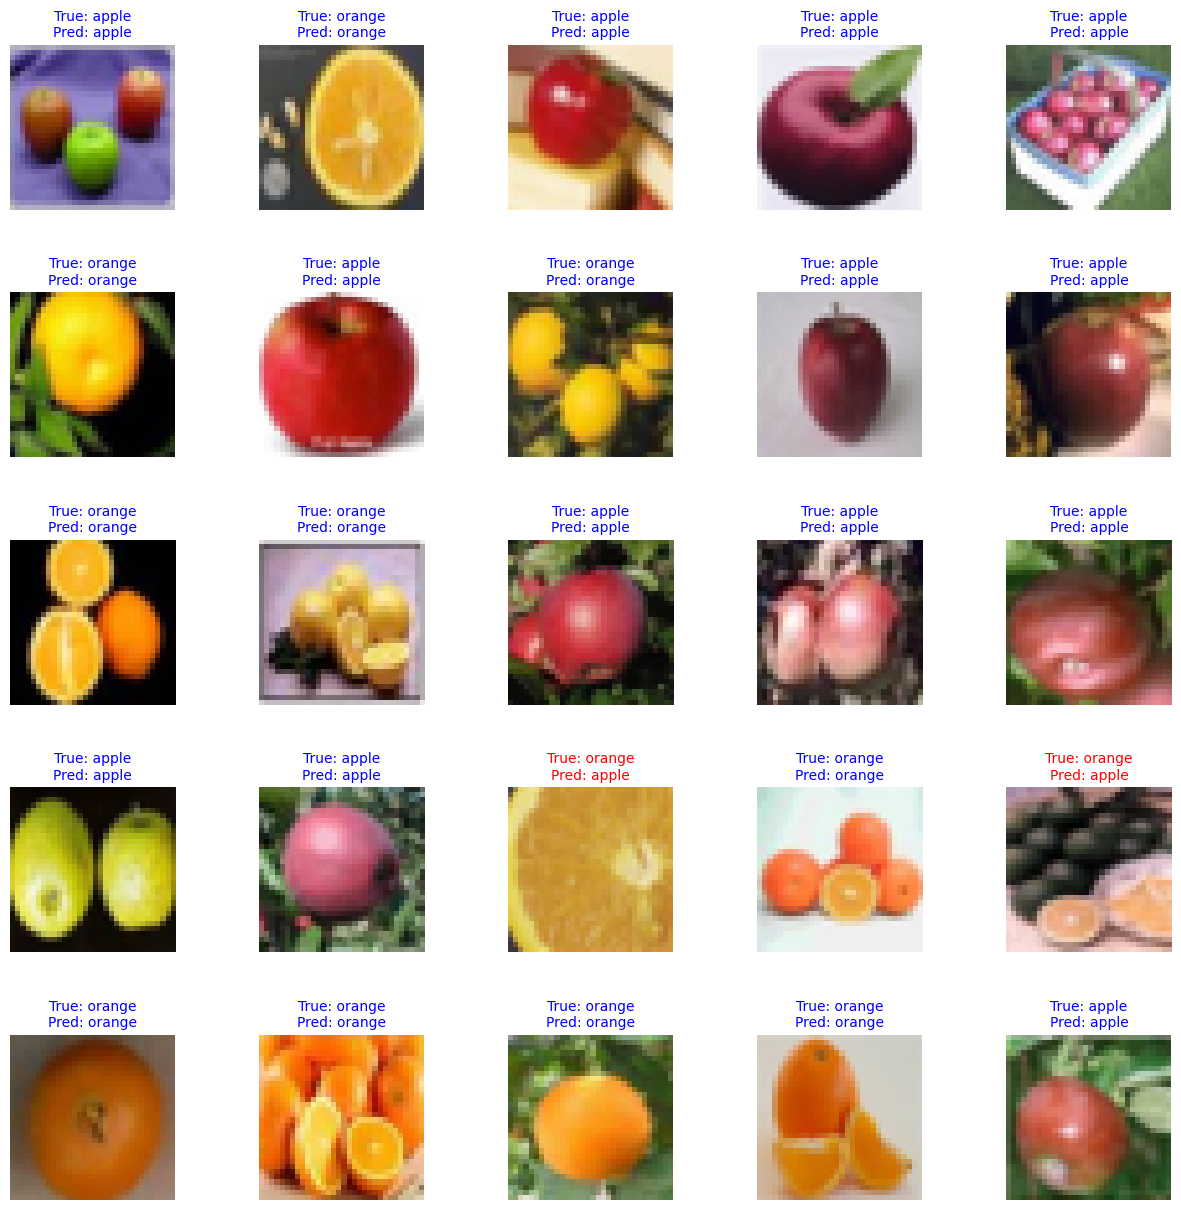

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and classification report
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Visualize predictions
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(25):
    img = test_images[i]
    true_label = class_names[y_true[i]]
    predicted_label = class_names[y_pred[i]]

    axes[i].imshow(img)
    axes[i].set_title(
        f"True: {true_label}\nPred: {predicted_label}",
        color='blue' if true_label == predicted_label else 'red',
        fontsize=10
    )
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

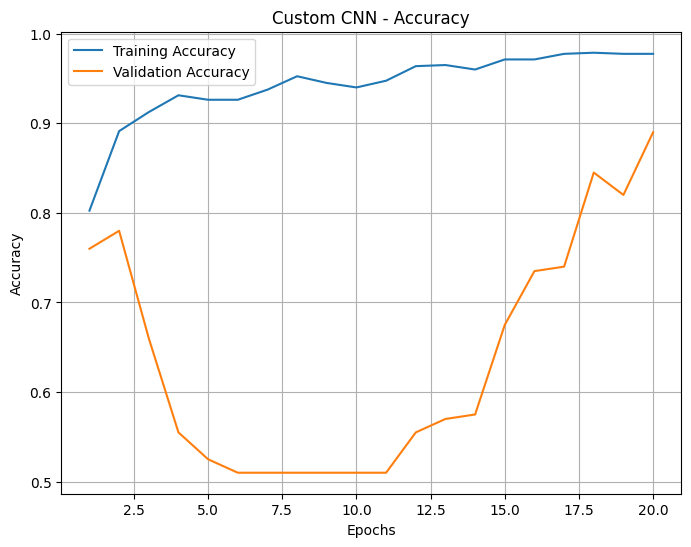

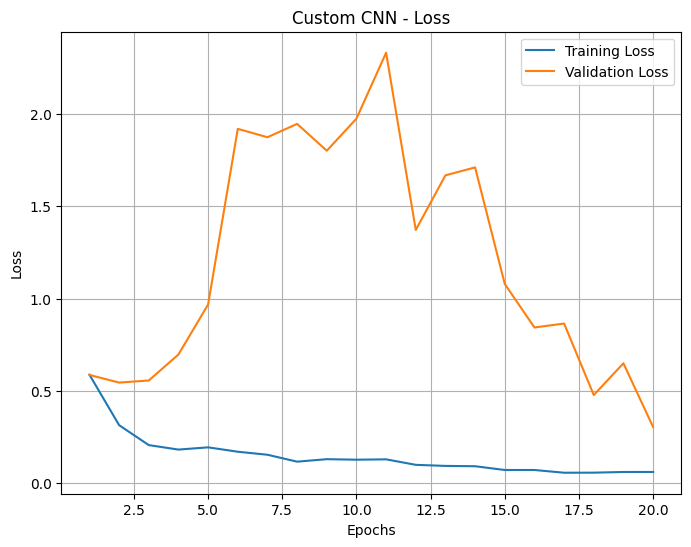

In [20]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history, model_name):
    """
    Plots training and validation accuracy and loss for a given model.

    Parameters:
    - history: Training history of the model (from model.fit).
    - model_name: Name of the model (e.g., 'Custom CNN' or 'Pretrained ResNet').
    """
    # Extract accuracy and loss from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot accuracy and loss for Custom CNN
plot_accuracy_loss(history=history, model_name='Custom CNN')

In [21]:
# Load pretrained ResNet50 model (excluding the top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet50
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output_layer = Dense(2, activation='softmax')(x)  # Output for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=2
)


Epoch 1/20
25/25 - 20s - 791ms/step - accuracy: 0.5900 - loss: 0.7950 - val_accuracy: 0.5800 - val_loss: 0.6644
Epoch 2/20
25/25 - 0s - 14ms/step - accuracy: 0.6538 - loss: 0.7365 - val_accuracy: 0.7250 - val_loss: 0.6349
Epoch 3/20
25/25 - 1s - 22ms/step - accuracy: 0.6737 - loss: 0.6672 - val_accuracy: 0.7300 - val_loss: 0.6215
Epoch 4/20
25/25 - 0s - 10ms/step - accuracy: 0.6662 - loss: 0.6681 - val_accuracy: 0.5150 - val_loss: 0.7374
Epoch 5/20
25/25 - 0s - 12ms/step - accuracy: 0.7063 - loss: 0.5914 - val_accuracy: 0.7050 - val_loss: 0.5991
Epoch 6/20
25/25 - 0s - 12ms/step - accuracy: 0.7075 - loss: 0.6067 - val_accuracy: 0.5200 - val_loss: 0.7036
Epoch 7/20
25/25 - 0s - 11ms/step - accuracy: 0.7300 - loss: 0.5618 - val_accuracy: 0.5150 - val_loss: 0.7367
Epoch 8/20
25/25 - 0s - 12ms/step - accuracy: 0.7275 - loss: 0.5796 - val_accuracy: 0.5500 - val_loss: 0.6710
Epoch 9/20
25/25 - 0s - 10ms/step - accuracy: 0.7400 - loss: 0.5653 - val_accuracy: 0.5150 - val_loss: 0.9280
Epoch 10

Test Accuracy: 0.77


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 647ms/step

Classification Report:
              precision    recall  f1-score   support

       apple       0.71      0.90      0.80       100
      orange       0.86      0.64      0.74       100

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.77       200
weighted avg       0.79      0.77      0.77       200



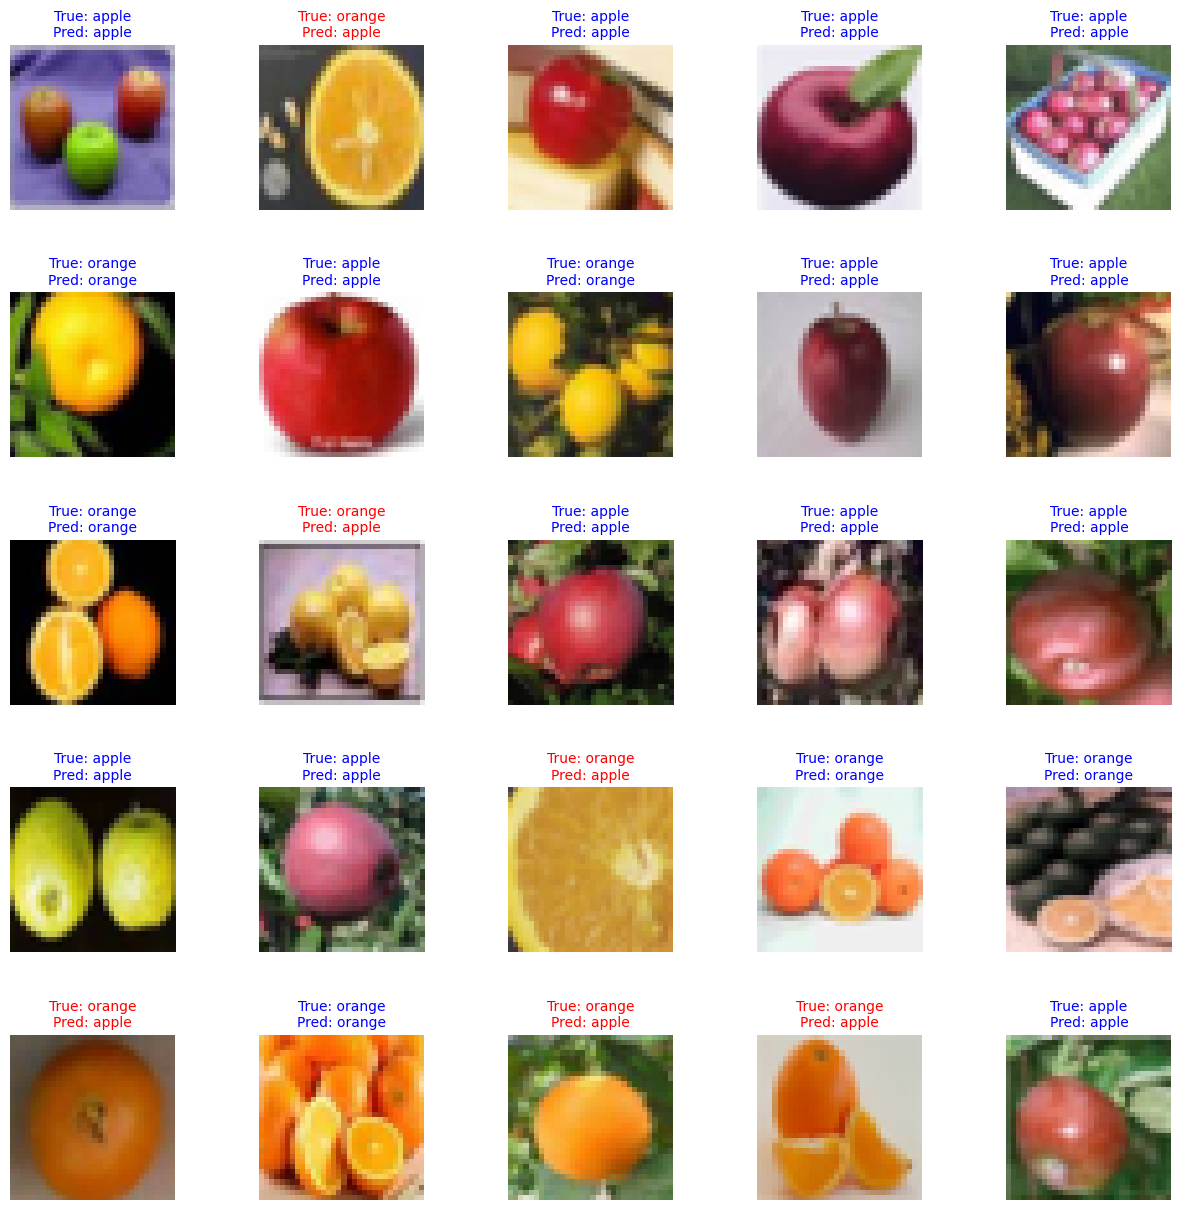

In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate predictions and classification report
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Visualize predictions
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(25):
    img = test_images[i]
    true_label = class_names[y_true[i]]
    predicted_label = class_names[y_pred[i]]

    axes[i].imshow(img)
    axes[i].set_title(
        f"True: {true_label}\nPred: {predicted_label}",
        color='blue' if true_label == predicted_label else 'red',
        fontsize=10
    )
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

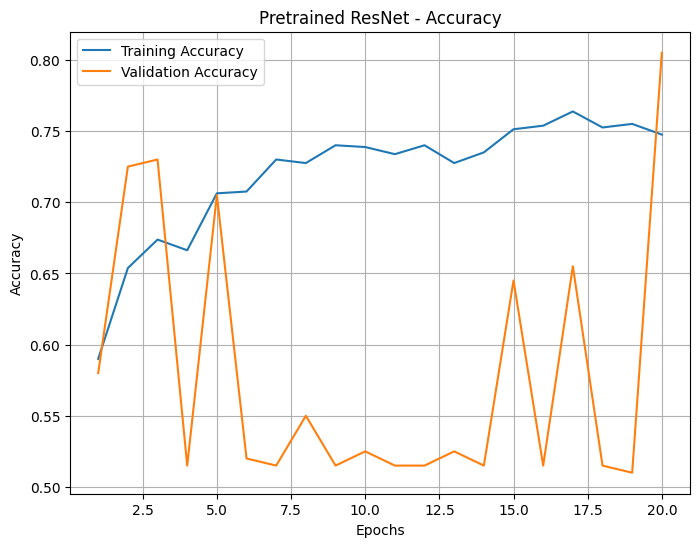

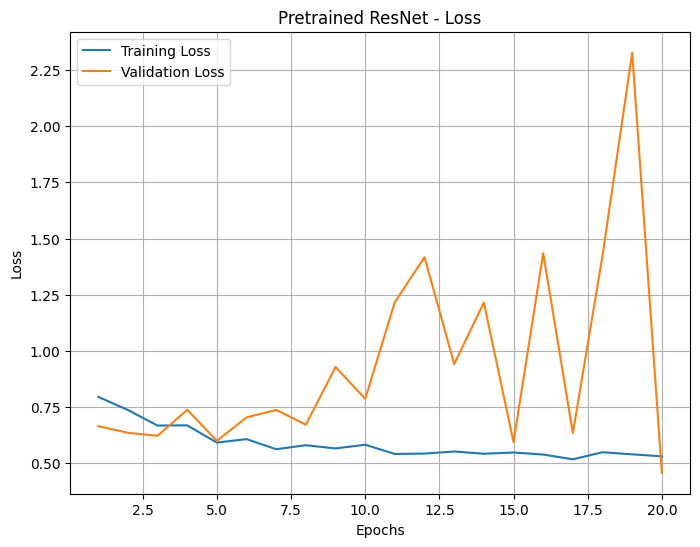

In [24]:
# Plot accuracy and loss for Pretrained ResNet
plot_accuracy_loss(history=history, model_name='Pretrained ResNet')